## Import Both input and response file
Change the import and export file variable 

In [1]:
#!pip install pandas
import pandas as pd

inputfile = 'example_explanatory_variables.csv'
outputfile = 'example_response_variable.csv'
pd.set_option('display.max_rows', None)
df_input = pd.read_csv(inputfile)
df_output = pd.read_csv(outputfile)
X = df_input
y= df_output['V1']
#print(X)

## Replace elements


In [2]:
Test = False

if(Test):
    X['Orientation'] = X.Orientation.astype(str)
    Ori = pd.get_dummies(X.Orientation)
    X = X.join(Ori)
    X.dtypes 
    X = X.drop('Orientation' ,axis = 1)

    Bk = pd.get_dummies(X.Backbone)
    X = X.join(Bk)
    X = X.drop('Backbone', axis = 1 )

    OD = pd.get_dummies(X.OligoDensity)
    X = X.join(OD, how='right')
    X = X.drop('OligoDensity', axis = 1)

    AT = pd.get_dummies(X.Attachment)
    X = X.join(AT)
    X = X.drop('Attachment', axis = 1)

#X.loc[(X.Lipid == '100%'), 'Lipid' ] = 1
#X.loc[(X.Lipid == '80%'), 'Lipid' ] = 0.8

    X['Size'] = X.Size.astype(str)
    Si = pd.get_dummies(X.Size)
    X = X.join(Si)
    X = X.drop('Size' ,axis = 1)

    X['Lipid'] = X.Lipid.astype(str)
    Li = pd.get_dummies(X.Lipid)
    X = X.join(Li) 
    X = X.drop('Lipid' ,axis = 1)

#X['OligoConc'] = X.OligoConc.astype(str)
#OC = pd.get_dummies(X.OligoConc)
#X = X.join(OC) 
#X = X.drop('OligoConc' ,axis = 1)

    X['PeptideDensity'] = X.PeptideDensity.astype(str)
    PD = pd.get_dummies(X.PeptideDensity)
    X = X.join(PD) 
    X = X.drop('PeptideDensity' ,axis = 1)


    
Features = ['Orientation','Backbone','OligoDensity','Attachment','Size','Lipid','PeptideDensity']
for name in Features:
    X[name] = X[name].astype(str)
    tem = pd.get_dummies(X[name])
    X = X.join(tem, how='right')
    X = X.drop(name, axis = 1)
        
#X = X[['1','10','100','1000','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','PeptideDensity','100%','80%','Size']]
X = X[['High' ,'Low', 'VHigh','Chol','DOPE','OligoConc','PO','PS','0.0','0.05','0.5','80%','100%','50','80','3','5']]
#'1','10','100','1000',,'0.0','0.05','0.5','80%','100%','50','80'
print(X.shape)

(672, 17)


In [3]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [4]:
print(regr.coef_)

[  1.48264132   8.7866066  -10.26924792  72.36682682 -72.36682682
   0.45993136 -26.52593735  26.52593735   3.91997336   2.85535461
  -6.77532798  -0.95587865   0.95587865  -2.15687961   2.15687961
 -25.52337485  25.52337485]


In [5]:
Pred = regr.predict(X)

0.5947729305542111
(672,)

MAE is  144.31326425952307


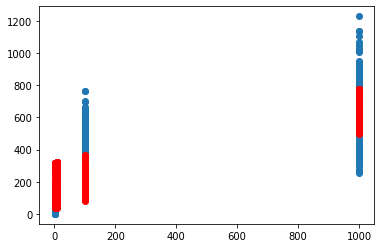

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statistics
import numpy as np
plt.scatter(X['OligoConc'],y)
plt.scatter(X['OligoConc'],Pred,c = "red")
print(r2_score(y,Pred))
print(np.shape(Pred))
print('\nMAE is ',mean_absolute_error(y ,Pred))

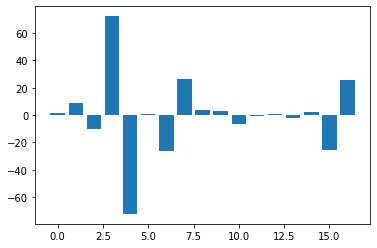

[  1.48264132   8.7866066  -10.26924792  72.36682682 -72.36682682
   0.45993136 -26.52593735  26.52593735   3.91997336   2.85535461
  -6.77532798  -0.95587865   0.95587865  -2.15687961   2.15687961
 -25.52337485  25.52337485]


In [7]:
importance = regr.coef_
X_import = [x for x in range(len(importance))]
plt.bar(X_import, importance.reshape(-1,))
plt.show()
print(importance.reshape(-1,))

K-fold cross-validation to get Q2 value (k-folds = 5)

In [8]:
import warnings
import math
import numpy
def getQ2(test_pred, test_res, rand_res): 

# this function calculates Q2 values

  # set up squared total error and squared residual error
    SS_tot = 0
    SS_res = 0
  
    # continuous variable
      # accumulate errors
    SS_tot = SS_tot + sum(numpy.square(numpy.subtract(test_res,rand_res)))
    SS_res = SS_res + sum(numpy.square(numpy.subtract(test_res,test_pred)))
    
  # do final Q2 calculation
    Q2 = 1 - SS_res / SS_tot
    #Q2 = 1 - (Sum(real-predict)/Sum(real-predict_group_mean))
  # something went wrong and there was NA (rare)
    if math.isnan(Q2) or pd.isna(Q2):
        Q2 = 0
        warn("Q2 in Q2.R created nan")
    return(Q2)

[0.5788852875033443, 0.5602478094025067, 0.5724821453569936, 0.5819536597665844, 0.5635916735705144]
[0.024709207573672853, 0.048593173155843904, 0.5563649169029439, 0.5714636260096622, 0.5715698220408388, 0.5715572105591233, 0.5715572105591231, 0.5714321151199886]


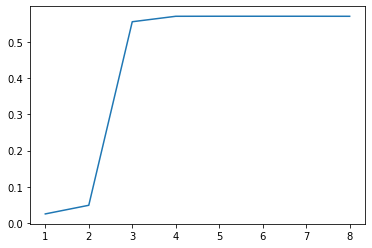

In [9]:
from sklearn.model_selection import KFold, train_test_split
import statistics as statss
kf = KFold(n_splits=5) #, shuffle = True
kf.get_n_splits(X)
regrt = linear_model.LinearRegression()
Q2=[]
z=0

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

for p in range(8):
    z=z+1
    CVX = X.iloc[:, 0:z].copy()
    if CVX.columns[len(CVX.columns)-1] == '3' or CVX.columns[len(CVX.columns)-1] == 'PO' or CVX.columns[len(CVX.columns)-1] == 'Chol'or CVX.columns[len(CVX.columns)-1] == '100%':
        z=z+1
        CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == 'High':
        z=z+2 
        CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == '1':
        z=z+3
        CVX = X.iloc[:, 0:z].copy()
    X_test_tem = X_test.iloc[:, 0:z].copy()
    y_test_tem = y_test

#CVX = Xt.copy()
    CVy = y.copy()
    Q2infold = []
    for train_index, test_index in kf.split(X):
        Test_pred = [] #predicted values
        Test_res = []  #original values
        rand_res = []  #training set mean values
        
        #print("TRAIN:", train_index, "TEST:", test_index)
        trainX , trainY = CVX.iloc[train_index] , CVy.iloc[train_index]
        testX , testY =  CVX.iloc[test_index] , CVy.iloc[test_index]
        #print(trainY)
        regrt.fit(trainX, trainY)
        Pred_test = regrt.predict(X_test_tem)#testX
        Mean_trained_y=statss.mean(trainY)
        for x in range(len(Pred_test)):
            rand_res.append(Mean_trained_y)
        Test_pred.extend(Pred_test)
        Test_res.extend(y_test_tem)#testY
        
    #print(trainX.head(2))
        Q2infold.append(getQ2(Test_pred,Test_res,rand_res))
    Q2.append(np.mean(Q2infold))
print(Q2infold)
plt.plot([1,2,3,4,5,6,7,8],Q2)
print(Q2)
plt.show()


-11357.23586314849
[332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.47237068
 332.47237068 332.47237068 332.47237068 332.47237068 332.

C:\Users\kenll\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


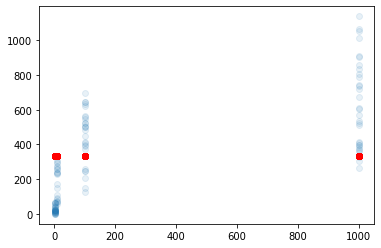

332.47237062937063
-14857.018793759153
[328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.99887158 328.99887158 328.99887158
 328.99887158 328.99887158 328.998871

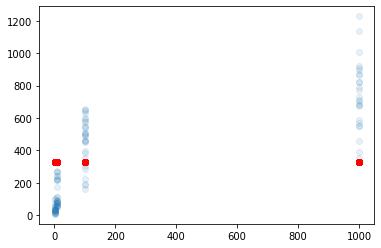

328.9988715617716
-13287.835059537276
[337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.04411349 337.04411349 337.04411349
 337.04411349 337.04411349 337.0441134

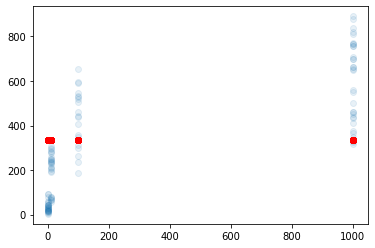

337.0441134883721
-11329.387631660016
[334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.80189067 334.80189067 334.80189067
 334.80189067 334.80189067 334.8018906

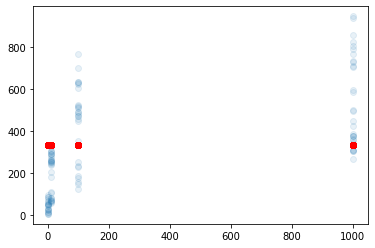

334.8018906976744
-10888.542136537144
[330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265 330.68265
 330.68265 330.68265 330.68265 330.6826

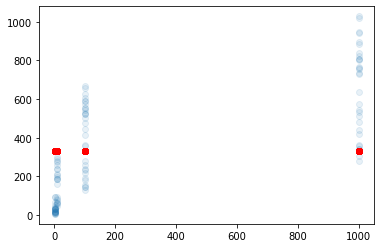

330.6826504651163
1.0


In [74]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, logit
from sklearn.preprocessing import normalize
#clf = LogisticRegression(random_state=10)
log_y = y.copy()
norm_y = numpy.divide(numpy.subtract(log_y, log_y.min()) , numpy.subtract(log_y.max(), log_y.min()))
norm_y = log_y
#mean_y = statss.mean(log_y)
#a = numpy.array(log_y.values.tolist())
#log_y = numpy.where(a >= mean_y, 1, 0).tolist()
#log_X = X[['OligoConc','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','0.0','0.05','0.5','100%','80%']]#Size
#log_X = X[['100%','80%','3','5','High' ,'Low', 'VHigh','PeptideDensity','PO','PS','Chol','DOPE','1','10','100','1000']]
#clf.fit(log_X, log_y)
#log_pred = clf.predict(log_X.head(100))
#print(expit([[1, 0.5, 1], [1, 0, 1], [1, 0, 1]]))
def sigmoid(x, a, b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,c):
    #print(x)
    y = numpy.divide(c , (1 + expit(-(b1*x[:,0]+b2*x[:,1]+b3*x[:,2]+b4*x[:,3]+b5*x[:,4]+b6*x[:,5]+b7*x[:,6]+b8*x[:,7]+b9*x[:,8]+b10*x[:,9]+b11*x[:,10]+b12*x[:,11]+b13*x[:,12]+b14*x[:,13]+b15*x[:,14]+b16*x[:,15]-a))))
    return y

from scipy.optimize import curve_fit

log_X=X.copy()
rand_resL = []
Test_predL = []
Test_resL = []
for train_index, test_index in kf.split(log_X):
    
    trainX , trainY = log_X.iloc[train_index] , norm_y.iloc[train_index]
    testX , testY =  log_X.iloc[test_index] , norm_y.iloc[test_index]

    Xdata = np.flip(trainX.to_numpy())
    #print(x[:,0])
    p0 = np.repeat(1,18)
    fitParams, fitCovariances = curve_fit(sigmoid, Xdata, np.array(trainY), p0)


    plt.scatter(testX['OligoConc'],testY,alpha = 0.1)
    #print(testX)
    testXnp = np.flip(testX.to_numpy())
    print(fitParams[0])
    outsig = sigmoid(testXnp,fitParams[0],fitParams[1],fitParams[2],fitParams[3],fitParams[4],fitParams[5],fitParams[6],fitParams[7],fitParams[8],fitParams[9],fitParams[10],fitParams[11],fitParams[12],fitParams[13],fitParams[14],fitParams[15],fitParams[16],fitParams[17])
    print(outsig)
    plt.scatter(testX['OligoConc'],outsig,c = "red")

    plt.show()
    Mean_trained_y = statss.mean(trainY.values.ravel())
    print(Mean_trained_y)
    for x in range(len(outsig)):
        rand_resL.append(Mean_trained_y)
    Test_predL.extend(outsig.ravel())
    Test_resL.extend(testY.values.ravel())
print(getQ2(rand_resL,Test_predL,Test_resL))

    
#print(log_X)
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(clf, log_X, log_y, values_format = 'd' , display_labels =['Did not leave', "left"])

[62, 64]
0.7095397148676171
[]
False
[]
[0.00322611582497212, 0.030202750654965693, 0.43748296582755974, 0.4521283864043639, 0.4508340515773379, 0.4433932232705401, 0.44339322327054, 0.44187024006246245]


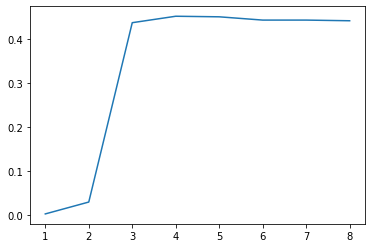

In [73]:
if(True):
    norm_y = numpy.divide(numpy.subtract(log_y, log_y.min()) , numpy.subtract(log_y.max(), log_y.min()))
    norm_y = norm_y.reset_index(drop = True)
    #print(norm_y.index)
    con0 = [i for i in range(len(norm_y)) if norm_y[i] == 0]
    con1 = [i for i in range(len(norm_y)) if norm_y[i] == 1]
    print(con0)
    norm_y = norm_y[norm_y > 0]
    norm_y = norm_y[norm_y < 1]
    nnorm_y = norm_y.reset_index(drop = True)
    print(nnorm_y[165])
    print([i for i in range(len(nnorm_y)) if nnorm_y[i] <0.00001])
    print(True in np.isinf(nnorm_y.to_numpy()))
    logis_y = -numpy.log(numpy.divide(numpy.subtract(1,nnorm_y.to_numpy()),nnorm_y.to_numpy()))
    #print(-numpy.log(numpy.divide(numpy.subtract(1,nnorm_y.to_numpy()),nnorm_y.to_numpy())))
    print([i for i in range(len(logis_y)) if np.isinf(logis_y[i])])
    Q2Log=[]
    zL=0
    regrt = linear_model.LinearRegression()
    for p in range(8):
        zL=zL+1
        CVXL = log_X.iloc[:, 0:zL].copy()
        if CVXL.columns[len(CVXL.columns)-1] == '3' or CVXL.columns[len(CVXL.columns)-1] == 'PO' or CVXL.columns[len(CVXL.columns)-1] == 'Chol'or CVXL.columns[len(CVXL.columns)-1] == '100%':
            zL=zL+1
            CVXL = log_X.iloc[:, 0:zL].copy()
        elif CVXL.columns[len(CVXL.columns)-1] == 'High':
            zL=zL+2 
            CVXL = log_X.iloc[:, 0:zL].copy()
        elif CVXL.columns[len(CVXL.columns)-1] == '1':
            zL=zL+3
            CVXL = log_X.iloc[:, 0:zL].copy()

        CVXL = CVXL.reset_index(drop = True)
        CVXL.drop(con0, inplace = True)
        CVXL.drop(con1, inplace = True)
        #print(CVXL)
        CVyL = pd.DataFrame(logis_y).copy()
        Test_predL = [] #predicted values
        Test_resL = []  #original values
        rand_resL = []  #training set mean values
        for train_index, test_index in kf.split(CVXL):
            trainX , trainY = CVXL.iloc[train_index] , CVyL.iloc[train_index]
            testX , testY =  CVXL.iloc[test_index] , CVyL.iloc[test_index]
            regrt.fit(trainX, trainY)
            Pred_test = regrt.predict(testX)#testX
            Mean_trained_y=statss.mean(trainY.values.ravel())
            for x in range(len(Pred_test)):
                rand_resL.append(Mean_trained_y)
            Test_predL.extend(Pred_test.ravel())
            Test_resL.extend(testY.values.ravel())

    #print(Test_predL)
        Q2Log.append(getQ2(Test_predL,Test_resL,rand_resL))
    print(Q2Log)
    plt.plot([1,2,3,4,5,6,7,8],Q2Log)
    plt.show()

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
#le = LabelEncoder()
#y_train_XGBoost = le.fit_transform(y)

xgbc = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)#tree_method="gpu_hist"#enable_categorical=True, eval_metric = mean_absolute_error


df_inBoost =  df_input.copy()
df_inBoost['Orientation'] = df_inBoost['Orientation'].astype("category")
df_inBoost['Backbone'] = df_inBoost['Backbone'].astype("category")
df_inBoost['OligoDensity'] = df_inBoost['OligoDensity'].astype("category")
df_inBoost['Attachment'] = df_inBoost['Attachment'].astype("category")
df_inBoost['Lipid'] = df_inBoost['Lipid'].astype("category")
df_inBoost['Size'] = df_inBoost['Size'].astype("category")
df_inBoost['PeptideDensity'] = df_inBoost['PeptideDensity'].astype("category")
#df_inBoost['OligoConc'] = df_inBoost['OligoConc'].astype("category")

df_inBoost, df_inBoost_test, df_outputB, df_outputB_test = train_test_split(df_inBoost, df_output, test_size=0.2)

print(df_inBoost.dtypes)
print(df_inBoost.shape)
print(df_outputB.shape)
xgbc.fit(df_inBoost,df_outputB)
Pred_XGB = xgbc.predict(df_inBoost_test)
plt.scatter(df_inBoost_test['OligoConc'],df_outputB_test)
#print(Pred_XGB)
plt.scatter(df_inBoost_test['OligoConc'],Pred_XGB,c = "red")
plt.show()
print('\nMAE is ',mean_absolute_error(df_outputB_test ,Pred_XGB))

print(statss.mean(Pred_XGB),np.std(Pred_XGB))

print(np.shape(Pred_XGB))

Q2 function for XGBoost

In [ ]:
from sklearn.metrics import mean_absolute_error
Q2Boost=[]
zB=0
xgbt = xgb.XGBRegressor(tree_method="hist",enable_categorical=True)#tree_method="hist",,enable_categorical=True, 
zB=8
    #zB=zB+1
    #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #if CVXB.columns[len(CVXB.columns)-1] == '3' or CVXB.columns[len(CVXB.columns)-1] == 'PO' or CVXB.columns[len(CVXB.columns)-1] == 'Chol'or CVXB.columns[len(CVXB.columns)-1] == '100%':
        #zB=zB+1
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #elif CVXB.columns[len(CVXB.columns)-1] == 'High':
        #zB=zB+2 
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #elif CVXB.columns[len(CVXB.columns)-1] == '1':
        #zB=zB+3
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()

    #print(CVXL.head(2))
CVXB = df_inBoost.copy()
CVyB = df_outputB.copy()

kf = KFold(n_splits=5,shuffle = True) #, shuffle = True
kf.get_n_splits(CVXB)
u=0
Q2infold = []
for train_index, test_index in kf.split(CVXB):
    Test_predB = [] #predicted values
    Test_resB = []  #original values
    rand_resB = []  #training set mean values
    
    print(u)
    u=u+1
    trainX , trainY = CVXB.iloc[train_index] , CVyB.iloc[train_index]
    testX , testY =  CVXB.iloc[test_index] , CVyB.iloc[test_index]
    xgbt.fit(trainX, trainY)
    Pred_test = xgbt.predict(df_inBoost_test)#testX
    Mean_trained_y=statss.mean(df_outputB_test.values.ravel())#trainY
    for x in range(len(Pred_test)):
        rand_resB.append(Mean_trained_y)
    Test_predB.extend(Pred_test.ravel())
    Test_resB.extend(testY.values.ravel())#testY
    Q2infold.append(getQ2(Test_predB,Test_resB,rand_resB))
    print(getQ2(Test_predB,Test_resB,rand_resB))
Q2Boost.append(np.mean(Q2infold))
print(Q2infold)
#Q2Boost.append(getQ2(Test_predB,Test_resB,rand_resB))
print(Q2Boost)
plt.plot([0,8],[Q2Boost,Q2Boost])
plt.show()

In [ ]:
#get importance
importanceXG = xgbt.feature_importances_
#summarize
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i,v))
#plot feature importance
plt.bar([x for x in range(len(importanceXG))], importanceXG)
plt.show()